### Pandas
    Pandas는 Panel Datas의 약자
    파이썬을 이용한 데이타 분석에서 가장 많이 사용되는 라이브러리
    Numpy기반으로 만들어졌다
    
    Padnas 자료구조
    1. Series - 1차원 배열(벡터)    
    2. DataFrame - 2차원 배열(메트릭스) 가장 중요(엑셀표 형식)    
    3. Panel - 3차원(대상아님)

### Series

### 1.시리즈 생성, 구조확인

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
# Series?

In [3]:
ser = Series([1,2,3,4,5])
ser

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [4]:
# ser1 = Series([1,'2', 3.0, '네 번째', 5])#여러데이터 타입의 값들을 섞어서 입력
# print(ser1)

# # 가장 범위가 넓은 것은 string인데, pandas에서는 object라고 표기된다.
# # 따라서, pandas에서 dtype : object라고 나오면, string(문자열)이라고 생각하면 된다.

# print('=' * 40)
# print(ser1[0])
# print(ser1[3])

In [5]:
# ser1 = Series(np.random.randint(10, 20, 5))
# print(ser1.index) # RangeIndex(start=0, stop=5, step=1)는 range(0, 5, 1)과 똑같다고 보면 된다.
# print(ser1.values)
# print(ser1.dtype)
# print(ser1)

In [6]:
#인덱스를 명시적으로 지정할 수 있다.

ser1 = Series(np.random.randint(10, 20, 5), index = list('abcde'))
print(ser1.index) 
print(ser1.values)
print(ser1.dtype)
print(ser1)
print(ser1['a'])
print(ser1[0]) # 기본 인덱스도 동작한다.

print(ser1.shape)
# series는 1차원이기에 series의 shape은 데이터 사이즈와 같다.
print('\n','*'*40)
# ser1 = Series(np.random.randint(10, 20, 5), index = list(range(1, 6)))
# print(ser1)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
[13 18 19 17 11]
int32
a    13
b    18
c    19
d    17
e    11
dtype: int32
13
13
(5,)

 ****************************************


### 2.시리즈 값 조회하기
    단일값을 선택하거나 여러값을 선택할때
    1)인덱스로 라벨을 사용할수 있다.
    
    2)슬라이싱 방법
        - 라벨사용 : 마지막 라벨 포함됨 ['a' : 'd']
        - 숫자사용 : 마지막 숫자 포함 안됨

In [8]:
ser1

a    13
b    18
c    19
d    17
e    11
dtype: int32

In [19]:
#숫자로도 라벨로도 가능
'''

라벨 슬라이싱의 경우 
마지막 라벨이 포함된다!!
'''
ser1[0]
ser1['a']

print(ser1[1:4]) # 숫자로 슬라이싱 하는 경우에는 1, 2, 3을 가져온다. 
# 기존 배열에서 배운 슬라이싱에서는 마지막 것은 가져오지 않는다.
# print(ser1['a':4]) # 이는 에러남
print(ser1['b':'d']) #슬라이싱에서 라벨을 쓸 때는 마지막 것도 가져온다.

b    18
c    19
d    17
dtype: int32
b    18
c    19
d    17
dtype: int32


In [24]:
ser1[:2] # 0, 1 추출
ser1_1 = ser1[::2]
ser1_1

a    13
c    19
e    11
dtype: int32

In [28]:
print(ser1)
print(ser1_1)

a    13
b    18
c    19
d    17
e    11
dtype: int32
a    13
c    19
e    11
dtype: int32


#### 시리즈간의 연산

'''
pandas는 값없음, 결측데이터, 누락 데이터는 모두 같은 말이다.
이는 모두 NaN으로 표현해준다.

Series끼리 더했을 때,  같은 행 값들끼리 더해지는데, 같은 행이 없다면 
그 값들은 NaN 값이 나온다.


dtype이 float64가 나온 이유도 NaN 때문이다.

NaN의 데이터타입이 float64이기 때문이다. NaN이 나오지 않았다면 int32가 나왔을 것이다.
'''

In [46]:
resSer = ser1 + ser1_1       
print(resSer)

a    26.0
b     NaN
c    38.0
d     NaN
e    22.0
dtype: float64


### 3. 누락 데이타 조회하기

* isnull() 
* notnull()
   

In [55]:
print(resSer.isnull())
print(resSer[resSer.isnull()])
print('%' * 40)
print(resSer.isnull().sum()) ## null의 갯수 파악

a    False
b     True
c    False
d     True
e    False
dtype: bool
b   NaN
d   NaN
dtype: float64
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
2


In [50]:
print(resSer.notnull())
print(resSer[resSer.notnull()])

a     True
b    False
c     True
d    False
e     True
dtype: bool
a    26.0
c    38.0
e    22.0
dtype: float64


### 4. Pandas를 이용한 시각화
#### 누락데이타가 아닌 데이타를 한눈에 보여준다

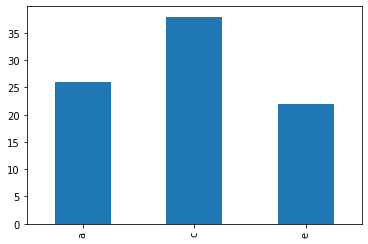

In [58]:
import matplotlib.pyplot as plt

resSer[resSer.notnull()].plot(kind = 'bar')
plt.show()